In [ ]:
#pip install pandas sqlalchemy

In [58]:
import mysql.connector
import pandas as pd
  
dataBase = mysql.connector.connect(     
  host ="localhost",
  user ="#####",
  passwd ="############",
  database="data cse",
)
 

# preparing a cursor object
cursorObject = dataBase.cursor()  #read write data base   
  
query = "SELECT * FROM `cse_data_table_2021_2022`"   
cursorObject.execute(query)
   
myresult = cursorObject.fetchall()


df = pd.DataFrame(myresult)

df.head()


In [ ]:
headers = ["TRADE_DATE","TRANSACTION_NO", "TRADE_TIME", "SECURITY", "BUY_CLIENT", "SELL_CLIENT", "PRICE", "QUANTITY"]
df.columns = headers
df.head()

,TRADE_DATE,TRANSACTION_NO,TRADE_TIME,SECURITY,BUY_CLIENT,SELL_CLIENT,PRICE,QUANTITY
0,1/4/2021,1,1/4/2021 11:00:05 AM,AAIC,20379,12445,34.7,208
1,1/4/2021,2,1/4/2021 11:00:05 AM,AAIC,57019,12445,34.7,100
2,1/4/2021,3,1/4/2021 11:00:06 AM,ACAP,40208,9061,6.9,500
3,1/4/2021,4,1/4/2021 11:00:06 AM,ACAP,40208,28588,6.9,3500
4,1/4/2021,5,1/4/2021 11:00:06 AM,ACL,40597,82296,79.0,180


In [ ]:
# Convert TRADE_DATE column to datetime format
df['TRADE_DATE'] = pd.to_datetime(df['TRADE_DATE'])

Total number of securities traded from 2021 to 2022

In [ ]:
# Total nymber of securities traded
total_volume = df['QUANTITY'].sum()
print("Total nymber of securities traded during 2021-2022 :", total_volume)

Total nymber of securities traded during 2021-2022 : 266458520340


Total value generated within the market by trading all securities

In [ ]:
# Calculate the total value traded by trading all securities
total_value = (df['PRICE'] * df['QUANTITY']).sum()

# Print the total value
print("Total value traded by trading all securities:", total_value)


Total value traded by trading all securities: 5579277589369.204


Number of Securities

In [ ]:
# Number of Securities
num_stocks = df['SECURITY'].nunique()
print("Number of Securities:", num_stocks)

Number of Securities: 317


Number of investors

In [ ]:

# Number of Investors (considering both BUY_CLIENT and SELL_CLIENT)
investors_buy = df['BUY_CLIENT'].nunique()
investors_sell = df['SELL_CLIENT'].nunique()

# Combine the unique buyer and seller IDs to get the total number of unique investors
investors_total = df[['BUY_CLIENT', 'SELL_CLIENT']].stack().nunique()

# Print the number of investors
print("Number of Investors:", investors_total)


Number of Investors: 97078


Top 5 Investors with the Highest Number of Transactions from 2021 to 2022

In [ ]:
# Filter transactions from 2021 to 2022
df_filtered = df[(df['TRADE_DATE'].dt.year >= 2021) & (df['TRADE_DATE'].dt.year <= 2022)]

# Group by investor and count the number of transactions
investor_transactions = df_filtered.groupby('BUY_CLIENT')['TRANSACTION_NO'].count().reset_index()

# Sort the transactions in descending order and select the top 5 investors
top_investors = investor_transactions.nlargest(5, 'TRANSACTION_NO')

# Print the top 5 investors and their number of transactions
print("Top 5 Investors with the Highest Number of Transactions (2021-2022):")
print(top_investors)


Top 5 Investors with the Highest Number of Transactions (2021-2022):
       BUY_CLIENT  TRANSACTION_NO
26200       31833           77358
40662       49366           71799
58065       70440           69504
63037       76458           67446
51422       62382           66660


Bottom 5 Investors with the Lowest Number of Transactions from 2021 to 2022

In [ ]:
# Filter transactions from 2021-2022
df_filtered = df[(df['TRADE_DATE'].dt.year >= 2021) & (df['TRADE_DATE'].dt.year <= 2022)]

# Group by investor and count the number of transactions
investor_transactions = df_filtered.groupby('BUY_CLIENT')['TRANSACTION_NO'].count().reset_index()

# Sort the transactions in ascending order and select the bottom 5 investors
bottom_investors = investor_transactions.nsmallest(5, 'TRANSACTION_NO')

# Print the bottom 5 investors and their number of transactions
print("Bottom 5 Investors with the Lowest Number of Transactions (2021-2022):")
print(bottom_investors)


Bottom 5 Investors with the Lowest Number of Transactions (2021-2022):
    BUY_CLIENT  TRANSACTION_NO
12          15               3
41          53               3
81         100               3
82         103               3
87         111               3


The highest number of transactions done by any investor

In [ ]:
# Find the highest number of transactions
highest_transactions = investor_transactions['TRANSACTION_NO'].max()

# Print the highest number of transactions
print("Highest Number of Transactions: ", highest_transactions)


Highest Number of Transactions:  77358


The lowest number of transactions done by any investor

In [ ]:
# Find the lowest number of transactions
lowest_transactions = investor_transactions['TRANSACTION_NO'].min()

# Print the lowest number of transactions
print("Lowest Number of Transactions: ", lowest_transactions)


Lowest Number of Transactions:  3


top 5 securities with the highest Number of Transactions from 2021 to 2022



In [ ]:

# Filter the data for the period 2021-2022
df_2021_2022 = df.loc[(df['TRADE_DATE'].dt.year >= 2021) & (df['TRADE_DATE'].dt.year <= 2022)]

# Count the number of transactions for each security
security_transactions = df_2021_2022['SECURITY'].value_counts()

# Get the top 5 securities with the highest number of transactions
top_securities = security_transactions.head(5)

# Print the top 5 securities with the highest number of transactions
print("Top 5 Securities with the Highest Number of Transactions (2021-2022):")
print(top_securities)


Top 5 Securities with the Highest Number of Transactions (2021-2022):
EXPO    3305832
BIL     2582433
LOFC    1818432
DIPD    1169490
RCL     1056171
Name: SECURITY, dtype: int64


top 5 securities with the lowest Number of Transactions from 2021 to 2022


In [ ]:

# Get the top 5 securities with the lowest number of transactions
bottom_securities = security_transactions.tail(5)

# Print the top 5 securities with the lowest number of transactions
print("Top 5 Securities with the Lowest Number of Transactions (2021-2022):")
print(bottom_securities)

Top 5 Securities with the Lowest Number of Transactions (2021-2022):
64133e574ecff9fe5df21d7caa83b4a4    315
e17ca4a10163801fb9c53e779cef624f    222
9dafc2f4e2029603ff424963034ce291    186
ASPM                                 27
fdb76bbcf1b3644fb70c97de871324b4     18
Name: SECURITY, dtype: int64


Number of transactions in every month from 2021 to 2022

In [ ]:
# In every month, how many transactions happen
monthly_transactions = df.groupby(df['TRADE_DATE'].dt.to_period('M')).size()
print("Number of transactions in every month:")
print(monthly_transactions)

Number of transactions in every month:
TRADE_DATE
2021-01    2888871
2021-02    1725267
2021-03     994359
2021-04    1190016
2021-05     999174
2021-06    1453197
2021-07    1353447
2021-08    2853225
2021-09    2412618
2021-10    1938045
2021-11    3275346
2021-12    3310959
2022-01    3360237
2022-02    2458668
2022-03    1491465
2022-04     520320
2022-05     933147
2022-06     798882
2022-07     829371
2022-08    2151891
2022-09    2291250
2022-10    1279371
2022-11    1014627
2022-12    1042470
Freq: M, dtype: int64


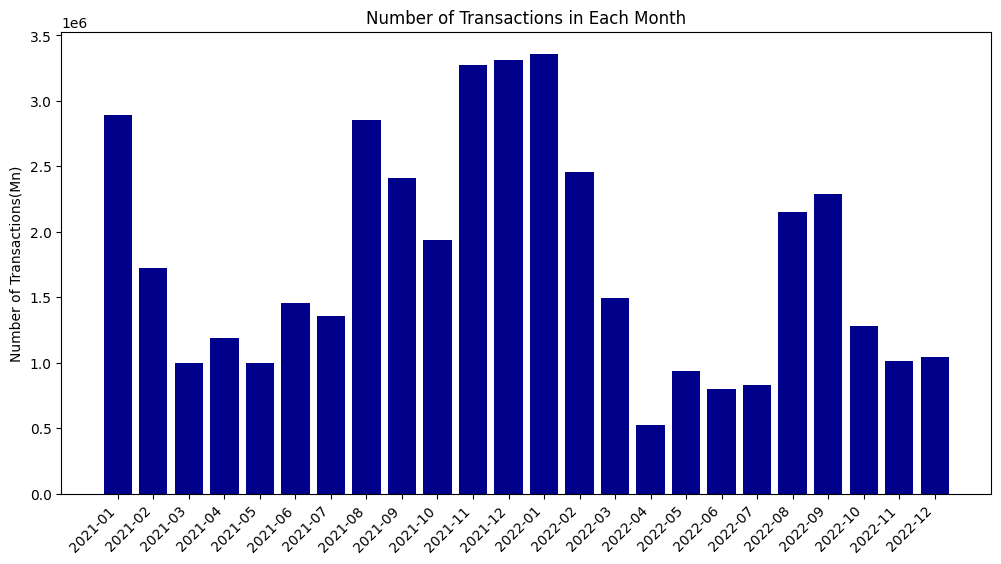

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert TRADE_DATE to string representation
df['TRADE_MONTH'] = df['TRADE_DATE'].dt.to_period('M').astype(str)

# Group the transactions by month and count the number of transactions
monthly_transactions = df.groupby('TRADE_MONTH').size().reset_index(name='Count')

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_transactions['TRADE_MONTH'], monthly_transactions['Count'], color='darkblue')

# Set x-axis labels as the month names
plt.xticks(rotation=45, ha='right')

# Set y-axis label
plt.ylabel('Number of Transactions(Mn)')

# Set title
plt.title('Number of Transactions in Each Month')

# Display the chart
plt.show()


Securities with the Most Transactions in Every Month from 2021 to 2022

In [ ]:

# Group the data by month and security, and count the number of transactions for each stock
monthly_most_trans_stocks = df.groupby([df['TRADE_DATE'].dt.to_period('M'), 'SECURITY']).size().reset_index(name='NUM_TRANSACTIONS')

# Find the security with the most number of transactions for each month
monthly_most_trans_stocks = monthly_most_trans_stocks.loc[monthly_most_trans_stocks.groupby('TRADE_DATE')['NUM_TRANSACTIONS'].idxmax()]

# Print the security with the most number of transactions in every month and its respective number of transactions
print("Securities with the Most Transactions in Every Month:")
print(monthly_most_trans_stocks)


Securities with the Most Transactions in Every Month:
     TRADE_DATE SECURITY  NUM_TRANSACTIONS
44      2021-01      BIL            268920
524     2021-02     VONE            117471
629     2021-03     DIPD             89070
894     2021-04     DIPD             96120
1112    2021-05      BIL             87804
1493    2021-06     LOLC             71727
1703    2021-07     EXPO            117414
1971    2021-08     EXPO            391467
2239    2021-09     EXPO            336720
2507    2021-10     EXPO            158271
2830    2021-11     LOFC            480672
3047    2021-12     EXPO            199098
3263    2022-01      BIL            183093
3607    2022-02     EXPO            202050
3888    2022-03     EXPO            134619
4166    2022-04     EXPO             82428
4442    2022-05     EXPO            132462
4714    2022-06     EXPO            108045
5044    2022-07     LIOC             74571
5319    2022-08     LIOC            158259
5595    2022-09     LIOC            112302


Security Sold at the Highest Price in Each Month

In [ ]:
# Which securities Sold at the Highest Price in Each Month

# Convert TRADE_DATE column to datetime format
df['TRADE_DATE'] = pd.to_datetime(df['TRADE_DATE'])

# Group the data by month and security, and find the maximum selling price
monthly_highest_price = df.groupby([df['TRADE_DATE'].dt.to_period('M'), 'SECURITY'])['PRICE'].max().reset_index()

# Find the security with the highest price in each month
monthly_highest_price = monthly_highest_price.loc[monthly_highest_price.groupby('TRADE_DATE')['PRICE'].idxmax()]

# Print the security sold at the highest price in each month compared to other securities
print("Security Sold at the Highest Price in Each Month:")
print(monthly_highest_price)

Security Sold at the Highest Price in Each Month:
     TRADE_DATE SECURITY    PRICE
236     2021-01     SWAD  22800.0
504     2021-02     SWAD  21500.0
772     2021-03     SWAD  18025.0
1037    2021-04     SWAD  18500.0
1305    2021-05     SWAD  17751.0
1571    2021-06     SWAD  21500.0
1836    2021-07     SWAD  18889.0
2105    2021-08     SWAD  17899.0
2373    2021-09     SWAD  17950.0
2641    2021-10     SWAD  17950.0
2910    2021-11     SWAD  17999.5
3189    2021-12     SWAD  13350.0
3470    2022-01     SWAD  14000.0
3751    2022-02     SWAD  18379.0
4033    2022-03     SWAD  16500.0
4311    2022-04     SWAD  15399.0
4453    2022-05     HARI   5600.0
4858    2022-06     SWAD  16999.0
5133    2022-07     SWAD  15000.0
5273    2022-08     HARI   5170.0
5684    2022-09     SWAD  15999.0
5826    2022-10     HARI   4500.0
6237    2022-11     SWAD  12550.0
6379    2022-12     HARI   4399.0


Security Sold at the Lowest Price in Each Month

In [ ]:
# Which securities Sold at the Lowest Price in Each Month

# Convert TRADE_DATE column to datetime format
df['TRADE_DATE'] = pd.to_datetime(df['TRADE_DATE'])

# Group the data by month and security, and find the minimum selling price
monthly_lowest_price = df.groupby([df['TRADE_DATE'].dt.to_period('M'), 'SECURITY'])['PRICE'].min().reset_index()

# Find the security with the lowest price in each month
monthly_lowest_price = monthly_lowest_price.loc[monthly_lowest_price.groupby('TRADE_DATE')['PRICE'].idxmin()]

# Print the security sold at the lowest price in each month compared to other securities
print("Security Sold at the Lowest Price in Each Month:")
print(monthly_lowest_price)

Security Sold at the Lowest Price in Each Month:
     TRADE_DATE                          SECURITY  PRICE
10      2021-01  93717247e5e2b1cff0b2a3acca3b86e0    0.2
275     2021-02  8967af686f324c3b272f3664e8daa5b3    0.1
543     2021-03  8967af686f324c3b272f3664e8daa5b3    0.1
1017    2021-04                              SEMB    0.2
1067    2021-05  01e1d14549a75aeb1337c7101faf4713    0.1
1335    2021-06  01e1d14549a75aeb1337c7101faf4713    0.1
1816    2021-07                              SEMB    0.1
2085    2021-08                              SEMB    0.1
2140    2021-09  6dbc60f4d96565e49ee37cd27368daf4    0.1
2621    2021-10                              SEMB    0.2
2890    2021-11                              SEMB    0.2
3168    2021-12                              SEMB    0.2
3228    2022-01  93717247e5e2b1cff0b2a3acca3b86e0    0.4
3509    2022-02  93717247e5e2b1cff0b2a3acca3b86e0    0.4
3784    2022-03  1e6628eba39d2301baba5ab93972fdcd    0.1
4063    2022-04  1e6628eba39d2301baba5a

Securities without Real Names

In [ ]:

file1 = pd.read_csv('Combined_dataset_with_replaced_security_Investors_IDs.csv')

x = file1.SECURITY.unique()
lst = [] 

for i in x:
    if len(i)>6:
        lst.append(i)




for i in range(1,10):
    print(lst[i])

ca1e31c654a888e7b15e4ce3fd0315fc
8bb8bc2e00b4fdcd42329370fb584c46
bd51722baf527016ac3578c6401e5b92
389ea4a439b59bec9afe9ac8d67ecdb0
feadf72bd17f09bac8de642fffd19f42
7be8a5ae18d45abbea3315d04cda9b6e
93717247e5e2b1cff0b2a3acca3b86e0
681304076ed51a06c8512b5761861219
1a8552db942205b7126ed661fbeaa4bc


Number of Securities without real names

In [ ]:
#number of Securities without real names
print(len(lst))

47


Average price of securities

In [ ]:
# Calculate the average price for each security
average_prices = df.groupby('SECURITY')['PRICE'].mean()

# Print the average price for each security
print("Average Stock Price:")
print(average_prices)

Average Stock Price:
SECURITY
01e1d14549a75aeb1337c7101faf4713      0.100000
0d7ec10e67b7ab433b5aa6cf86322ed7     66.846715
146724c2b0371e9f0cb352a147cadeeb      6.842088
1a8552db942205b7126ed661fbeaa4bc     15.733960
1e6628eba39d2301baba5ab93972fdcd      0.196154
                                       ...    
f4ca17b7678af4d11cae2a975c66b5fc      0.543825
f7ecceba1f04901bf3df1fa74c4db8f7    196.394861
fbc990663b0def3d6a3358e9df6471ae     10.858504
fdb76bbcf1b3644fb70c97de871324b4      6.850000
feadf72bd17f09bac8de642fffd19f42     14.079341
Name: PRICE, Length: 317, dtype: float64


Top 5 Securities with the Highest Average Stock Price

In [ ]:
# Calculate the average price for each security
average_prices = df.groupby('SECURITY')['PRICE'].mean()

# Get the top 5 Securities with the highest average stock price
top_5_stocks = average_prices.nlargest(5)

# Print the top 5 Securities with the highest average stock price
print("Top 5 Securities with the Highest Average Stock Price:")
print(top_5_stocks)


Top 5 Securities with the Highest Average Stock Price:
SECURITY
SWAD    17767.316558
HARI     3968.911826
SLND     1799.519307
CINS     1367.406115
SOY      1272.084914
Name: PRICE, dtype: float64


Bottom 5 Securities with the Lowest Average Stock Price

In [ ]:
# Calculate the average price for each security
average_prices = df.groupby('SECURITY')['PRICE'].mean()

# Get the bottom 5 Securities with the lowest average stock price
bottom_5_stocks = average_prices.nsmallest(5)

# Print the bottom 5 Securities with the lowest average stock price
print("Bottom 5 Securities with the Lowest Average Stock Price:")
print(bottom_5_stocks)

Bottom 5 Securities with the Lowest Average Stock Price:
SECURITY
25284d25e431ffd215f8e0fe28b8577d    0.100000
9dafc2f4e2029603ff424963034ce291    0.100000
01e1d14549a75aeb1337c7101faf4713    0.100000
e17ca4a10163801fb9c53e779cef624f    0.100000
6dbc60f4d96565e49ee37cd27368daf4    0.182447
Name: PRICE, dtype: float64


Bell Curve for Average Stock Prices

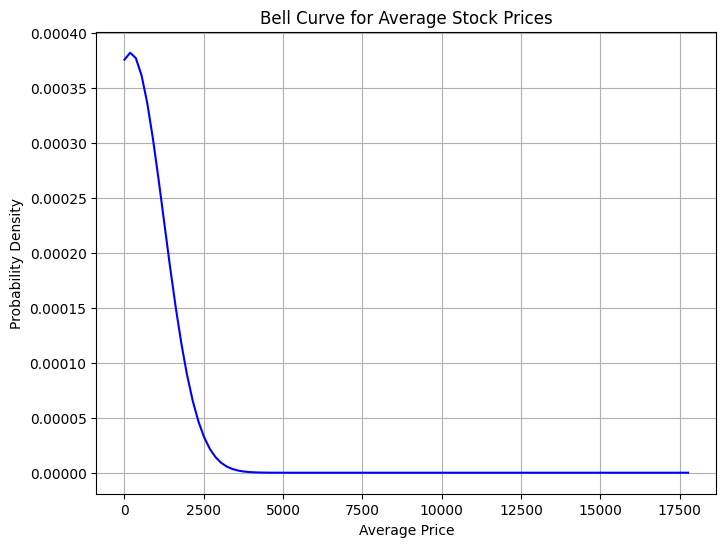

In [ ]:

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np



# Calculate the average price for each security
average_prices = df.groupby('SECURITY')['PRICE'].mean()

# Fit the data to a normal distribution
mu, sigma = stats.norm.fit(average_prices)

# Create a range of x values
x = np.linspace(min(average_prices), max(average_prices), 100)

# Generate the y values for the bell curve
y = stats.norm.pdf(x, mu, sigma)

# Plot the bell curve

plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue')
plt.xlabel('Average Price')
plt.ylabel('Probability Density')
plt.title('Bell Curve for Average Stock Prices')
plt.grid(True)
plt.show()


Transactions for a randomly selected Security

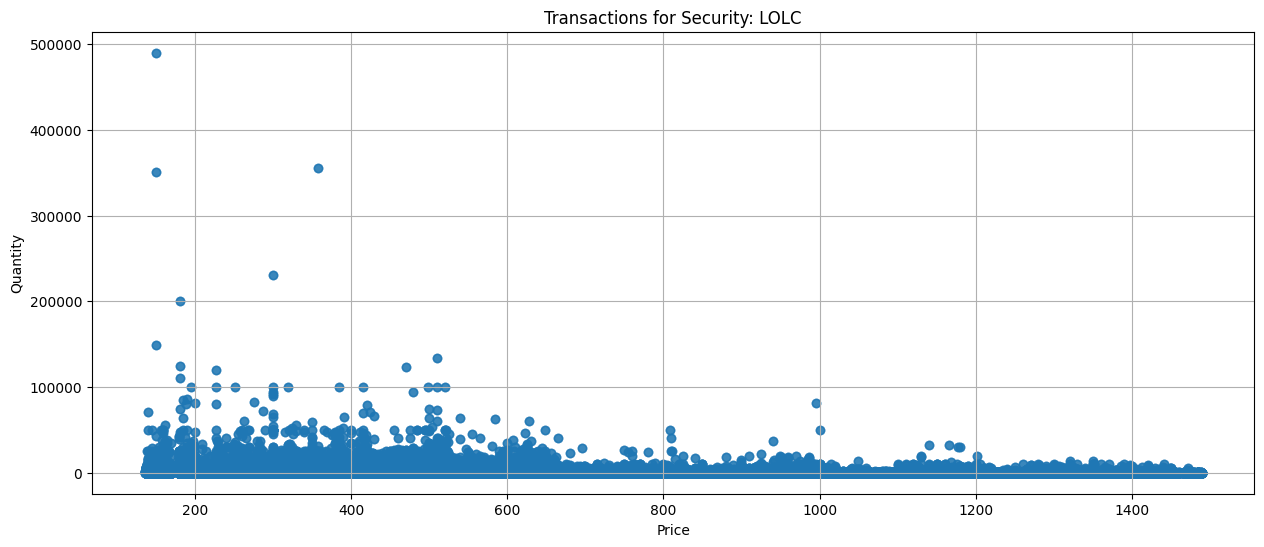

In [ ]:
import plotly.io as pio
import plotly.express as px

# Select a random stock from the dataset
random_stock = df['SECURITY'].sample(n=1).values[0]

# Filter the transactions for the selected stock
stock_transactions = df[df['SECURITY'] == random_stock]

# Create a scatter plot of the transactions
pio.templates.default = 'plotly_dark'
plt.figure(figsize=(15, 6))
plt.scatter(stock_transactions['PRICE'], stock_transactions['QUANTITY'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title(f'Transactions for Security: {random_stock}')
plt.grid(True)
plt.show()


Behaviour of a randomly selected Investor

C:\Users\pc\AppData\Local\Temp\ipykernel_20424\281280560.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investor_transactions['VALUE'] = investor_transactions['PRICE'] * investor_transactions['QUANTITY']


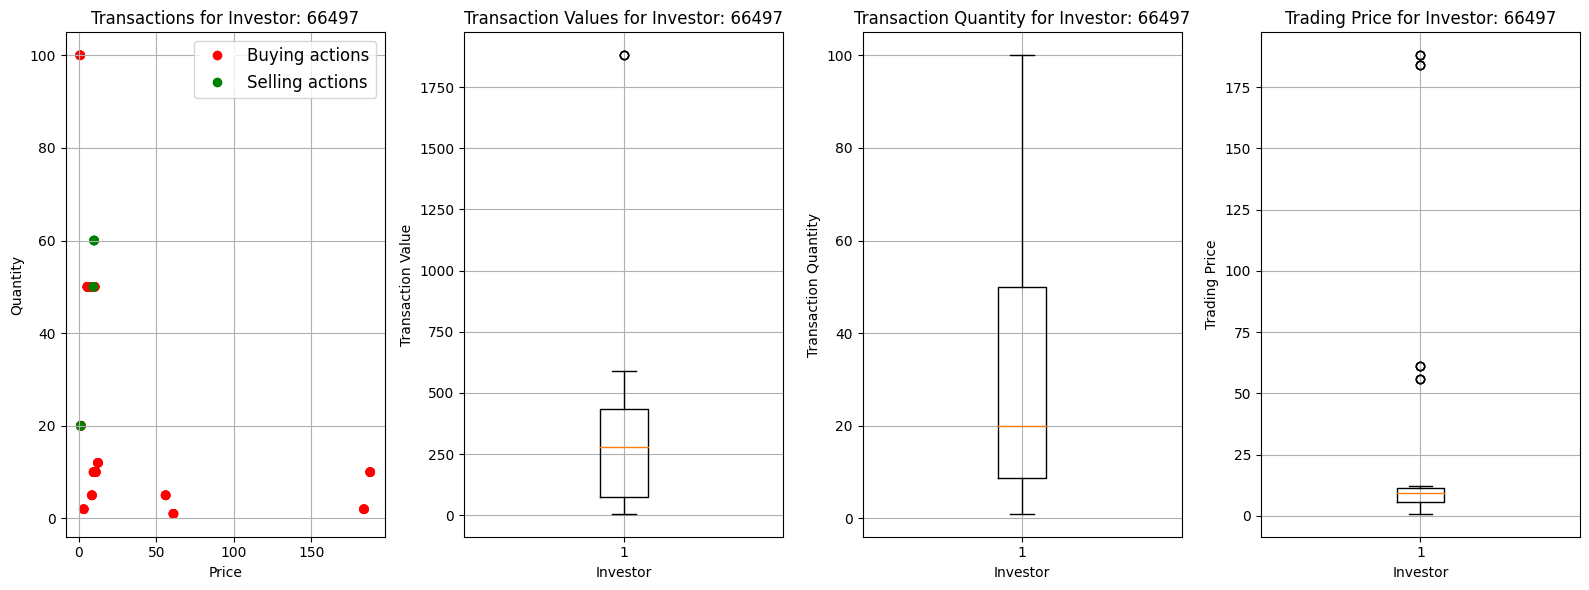

In [ ]:
import random

# Select a random investor from the dataset with fewer transactions
random_investor = random.choice(df['BUY_CLIENT'].unique())

# Filter the transactions for the selected investor
investor_transactions = df[(df['BUY_CLIENT'] == random_investor) | (df['SELL_CLIENT'] == random_investor)]

# Create a scatter plot of the transactions
plt.figure(figsize=(16, 6))
plt.subplot(1, 4, 1)
plt.scatter(
    investor_transactions['PRICE'],
    investor_transactions['QUANTITY'],
    c=['red' if x == random_investor else 'green' for x in investor_transactions['BUY_CLIENT']]
)

# Set custom legend labels
custom_legend_labels = ['Buying actions' if x == random_investor else 'Selling actions' for x in investor_transactions['BUY_CLIENT']]
plt.legend(custom_legend_labels, loc='upper left', fontsize=12)

# Add legend for red (buying) and green (selling) colors
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Buying actions'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Selling actions')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title(f'Transactions for Investor: {random_investor}')
plt.grid(True)

# Calculate the transaction values
investor_transactions['VALUE'] = investor_transactions['PRICE'] * investor_transactions['QUANTITY']

# Create a box plot of the transaction values
plt.subplot(1, 4, 2)
plt.boxplot(investor_transactions['VALUE'])
plt.xlabel('Investor')
plt.ylabel('Transaction Value')
plt.title(f'Transaction Values for Investor: {random_investor}')
plt.grid(True)

# Create a box plot of the transaction quantity
plt.subplot(1, 4, 3)
plt.boxplot(investor_transactions['QUANTITY'])
plt.xlabel('Investor')
plt.ylabel('Transaction Quantity')
plt.title(f'Transaction Quantity for Investor: {random_investor}')
plt.grid(True)

# Create a box plot of the trading price
plt.subplot(1, 4, 4)
plt.boxplot(investor_transactions['PRICE'])
plt.xlabel('Investor')
plt.ylabel('Trading Price')
plt.title(f'Trading Price for Investor: {random_investor}')
plt.grid(True)

plt.tight_layout()
plt.show()


Bubble Chart of Transactions Grouped by Value

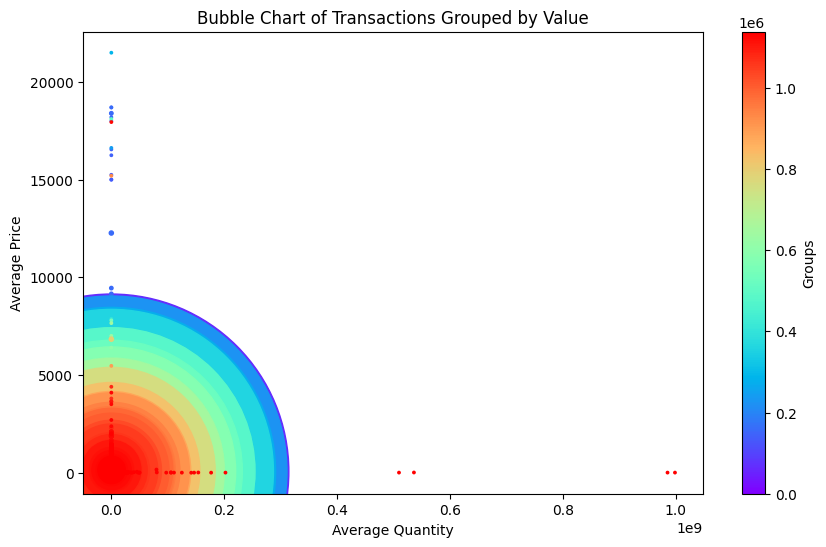

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value of each transaction
df['VALUE'] = df['QUANTITY'] * df['PRICE']

# Group transactions based on value
grouped_transactions = df.groupby('VALUE')

# Extract the required data for the bubble chart
x = grouped_transactions['QUANTITY'].mean()
y = grouped_transactions['PRICE'].mean()
sizes = grouped_transactions.size()

# Generate a unique color for each group
colors = range(len(grouped_transactions))

# Create the bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=sizes, c=colors, cmap='rainbow')
plt.colorbar(label='Groups')
plt.xlabel('Average Quantity')
plt.ylabel('Average Price')
plt.title('Bubble Chart of Transactions Grouped by Value')
plt.show()




In [ ]:
import pandas as pd

# Read the CSV file
file1 = pd.read_csv('D:\\Trade Data_New\\combined_cse.csv')
file1

,TRADE_DATE,TRANSACTION_NO,TRADE_TIME,SECURITY,BUY_CLIENT,SELL_CLIENT,PRICE,QUANTITY
0,1/4/2021,1,1/4/2021 11:00:05 AM,ce4e52f4cd0dad8e8383240bd04d19ea,356f12a31f5b5dce06d3df8ca06c8fbb,2097905feac67207a922f47dd86a0e4a,34.7,208
1,1/4/2021,2,1/4/2021 11:00:05 AM,ce4e52f4cd0dad8e8383240bd04d19ea,95a599cb1bc62dca5134d9fd8f6206df,2097905feac67207a922f47dd86a0e4a,34.7,100
2,1/4/2021,3,1/4/2021 11:00:06 AM,c78fbb8889317b12dba027f01522ba43,69b402a6033c3ea64893122f52c17c31,1787843be5bdd6d660ece31d06bad383,6.9,500
3,1/4/2021,4,1/4/2021 11:00:06 AM,c78fbb8889317b12dba027f01522ba43,69b402a6033c3ea64893122f52c17c31,4b508fcce38c86a858654234a08c9bcb,6.9,3500
4,1/4/2021,5,1/4/2021 11:00:06 AM,b011ebc2b04539bf5c0d4d52a2a5a4c0,6acf82f249e2906fd94d893193a99657,d90714ab78a5c950e758c30d106e60dc,79.0,180
...,...,...,...,...,...,...,...,...
14188736,12/30/2022,347546,12/30/2022 1:00:03 PM,f205a64768cb2ee23ea75f05dc0fb9ea,43f10f3a86d51d73b83285802de27d45,b24279ecd15375ef7031ea564850dfb0,10.2,92863
14188737,12/30/2022,347547,12/30/2022 1:00:03 PM,f205a64768cb2ee23ea75f05dc0fb9ea,43f10f3a86d51d73b83285802de27d45,087a8e1ec27595bff7150e7da2239e69,10.2,7001
14188738,12/30/2022,347548,12/30/2022 1:00:03 PM,f205a64768cb2ee23ea75f05dc0fb9ea,43f10f3a86d51d73b83285802de27d45,ad51b9ed47b6709168d9fdb432e20ead,10.2,1000
14188739,12/30/2022,347549,12/30/2022 1:00:03 PM,f205a64768cb2ee23ea75f05dc0fb9ea,43f10f3a86d51d73b83285802de27d45,7f235ba26c5061eea0ef24dea0036a7f,10.2,50


In [2]:
import pandas as pd
file2 = pd.read_excel('D:\\Trade Data_New\\security_details_mrkts.xlsx')
file2

,SECURITY Code,SECURITY
0,AAF.N0000,8f9cc2c7d230275455d1d2c701c9a980
1,AAF.P0000,4a05c95f0c0226b9adb457cfc44cb18a
2,AAIC.N0000,ce4e52f4cd0dad8e8383240bd04d19ea
3,ABAN.N0000,89fa58bd7b1641a4e3db3b580cbbb6c9
4,ABL.N0000,040a108e3beba6136530022a0d4aecad
...,...,...
289,VPEL.N0000,ba739376c2d5b578e1c76a9642ff655b
290,WAPO.N0000,b4c78bc770415ca9fc86466d74ce4cfa
291,WATA.N0000,a79f65566bc91ffebdfea456dc5c7ff2
292,WIND.N0000,b170cae230ed1e593598af5537572e85
